# Importing all required Libraries

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [109]:
# reading the csv file
df = pd.read_csv(r"C:\Users\mouni\Downloads\churn_dataset.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Cleaning

In [110]:
# Gives number of rows and columns of a DataFrame
df.shape

(7043, 21)

In [111]:
# Checking number of duplicates in a DF
df.duplicated().sum()

0

In [112]:
# Checking Null Values count of each column in a DataFrame
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [113]:
# changing the datatype of TotalCharges Column from object to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [115]:
# removing outliers in bmi column by using IQR Method
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3 - Q1
bmi_lower_bound = Q1 - 1.5*IQR
bmi_upper_bound = Q3 + 1.5*IQR
df = df[(df['tenure'] > bmi_lower_bound)&(df['tenure']<bmi_upper_bound)]
print(df.shape)

(7043, 21)


In [117]:
# removing outliers in bmi column by using IQR Method
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
bmi_lower_bound = Q1 - 1.5*IQR
bmi_upper_bound = Q3 + 1.5*IQR
df = df[(df['MonthlyCharges'] > bmi_lower_bound)&(df['MonthlyCharges']<bmi_upper_bound)]
print(df.shape)

(7043, 21)


In [118]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Exploration

In [119]:
# returns the tuple that contains 
df.shape

(7043, 21)

In [120]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [121]:
len(df.columns)

21

In [122]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [123]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7033, 7034, 7035, 7036, 7037, 7038, 7039, 7040, 7041, 7042],
           dtype='int64', length=7043)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [125]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [126]:
df.select_dtypes(include = 'number')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [127]:
df.select_dtypes(include = 'object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [128]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [129]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [130]:
df['SeniorCitizen'].nunique()

2

In [131]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [132]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [133]:
df['tenure'].nunique()

73

In [134]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [135]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [136]:
df['MonthlyCharges'].nunique()

1585

In [137]:
df['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [172]:
df['MonthlyCharges'].value_counts(normalize = True)

20.05     0.008661
19.85     0.006389
19.95     0.006247
19.90     0.006247
20.00     0.006105
            ...   
23.65     0.000142
114.70    0.000142
43.65     0.000142
87.80     0.000142
78.70     0.000142
Name: MonthlyCharges, Length: 1585, dtype: float64

# Data Visualization

# Uni-variate Analysis:

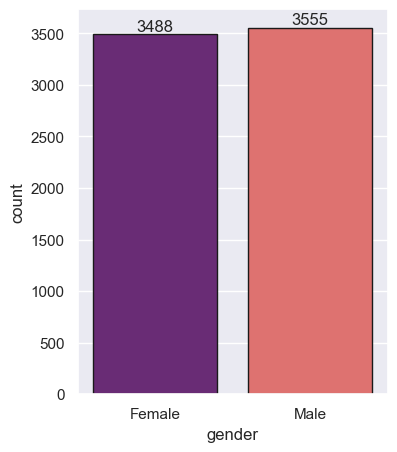

In [138]:
sns.set(rc={'figure.figsize':(4,5)})
a = sns.countplot(x = 'gender', data = df, palette ='magma', edgecolor = 'k')
for i in a.containers:
    a.bar_label(i)

# Observation:

- Male Customers are more in number as compared to Females.

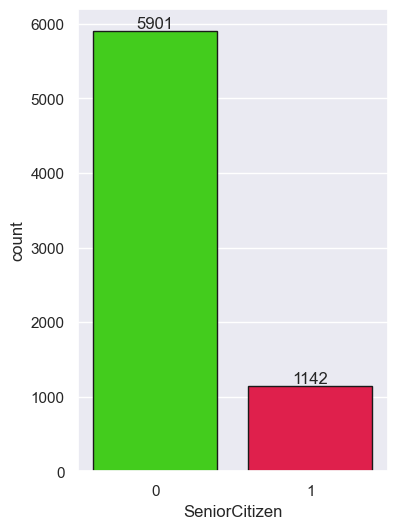

In [139]:
sns.set(rc={'figure.figsize':(4,6)})
a = sns.countplot(x = 'SeniorCitizen', data = df, palette = 'prism', edgecolor = 'k')
for i in a.containers:
    a.bar_label(i)

# Observation:

- Senior Citizen Customers are less in number as compared to Senior Citizens.

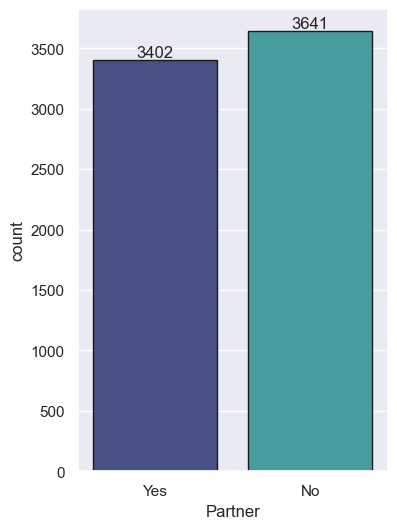

In [141]:
sns.set(rc={'figure.figsize':(4,6)})
a = sns.countplot(x = 'Partner', data = df, palette = 'mako', edgecolor = 'k')
for i in a.containers:
    a.bar_label(i)

# Observation:

- The Customers who have no Partner is more in number as compared to Customers having Partner.

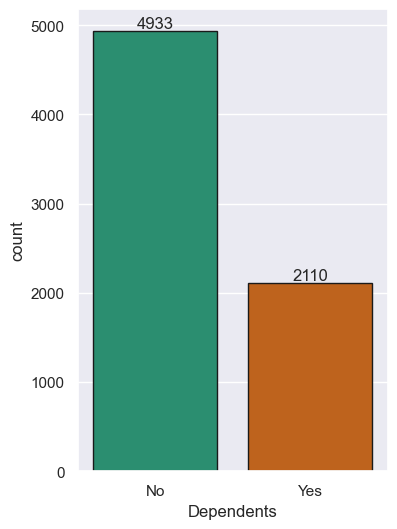

In [142]:
sns.set(rc={'figure.figsize':(4,6)})
a = sns.countplot(x = 'Dependents', data = df, palette = 'Dark2', edgecolor = 'k')
for i in a.containers:
    a.bar_label(i)

# Observation:

- The Customers who have no Dependents is more in number as compared to Customers having Dependents.

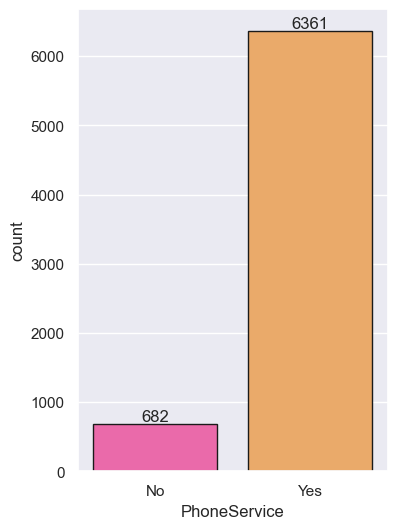

In [143]:
sns.set(rc={'figure.figsize':(4,6)})
a = sns.countplot(x = 'PhoneService', data = df, palette = 'spring', edgecolor = 'k')
for i in a.containers:
    a.bar_label(i)

# Observation:

- The Customers who have Phone Service is more in number as compared to the Customers who have no Phone Services. 

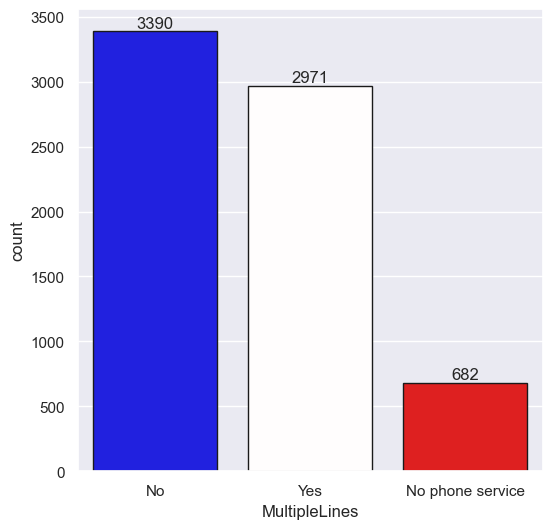

In [144]:
sns.set(rc={'figure.figsize':(6,6)})
a = sns.countplot(x = 'MultipleLines', data = df, palette = 'seismic', edgecolor = 'k', order = ['No', 'Yes', 'No phone service'])
for i in a.containers:
    a.bar_label(i)

# Observation:

- the customers who have no multiple lines are more in number and the customers who have No Phone Services are less in number.

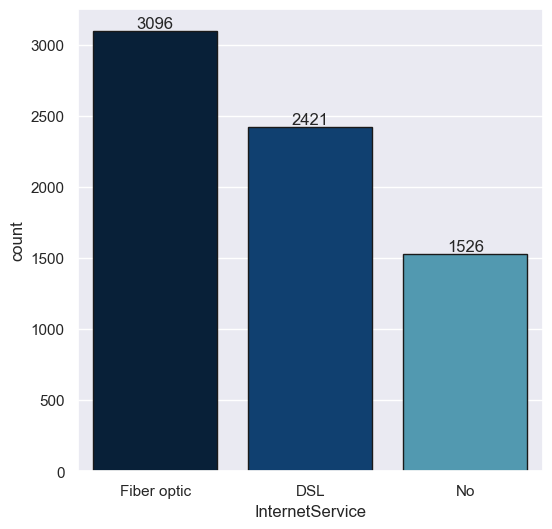

In [145]:
sns.set(rc={'figure.figsize':(6,6)})
a = sns.countplot(x = 'InternetService', data = df, palette = 'ocean', order = ['Fiber optic', 'DSL', 'No'], edgecolor = 'k')
for i in a.containers:
    a.bar_label(i)

# Observation:

- DSL provides internet services for more Customers as compared to DSL.

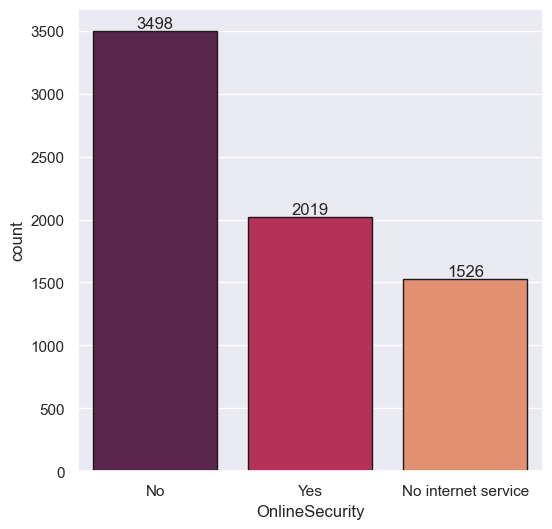

In [146]:
sns.set(rc={'figure.figsize':(6,6)})
a = sns.countplot(x = 'OnlineSecurity', data = df, palette = 'rocket', edgecolor = 'k')
for i in a.containers:
    a.bar_label(i)

# Observation:

- The Customers who have no Online Security are more in number as compared to other.
- The Customers who have no Internet Service are less in number as compared to other.

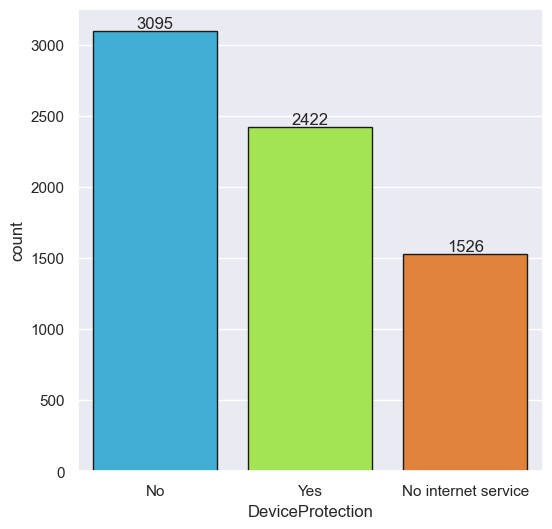

In [147]:
sns.set(rc={'figure.figsize':(6,6)})
a = sns.countplot(x = 'DeviceProtection', data = df, palette = 'turbo', edgecolor = 'k')
for i in a.containers:
    a.bar_label(i)

# Observations:

- The Customers who have no Device Protection are more in number as compared to other.
- The Customers who have no Internet Service are less in number as compared to other.

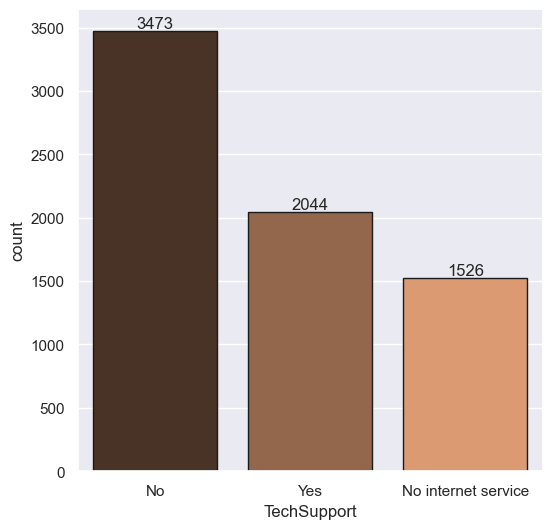

In [148]:
sns.set(rc={'figure.figsize':(6,6)})
a = sns.countplot(x = 'TechSupport', data = df, palette = 'copper', edgecolor = 'k')
for i in a.containers:
    a.bar_label(i)

# Observations:

- The Customers who have no Tech Support are more in number as compared to other.
- The Customers who have no Internet Service are less in number as compared to other.

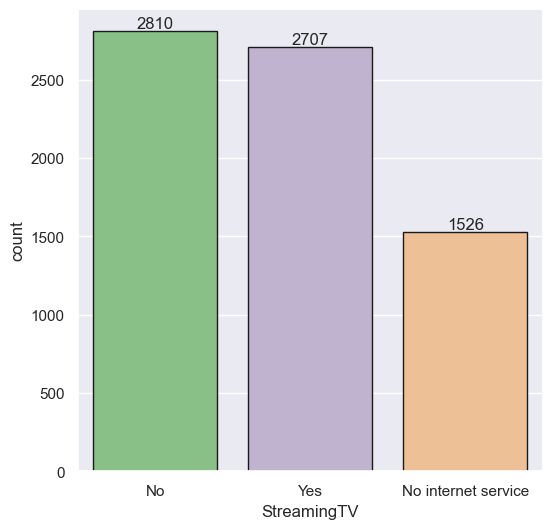

In [149]:
sns.set(rc={'figure.figsize':(6,6)})
a = sns.countplot(x = 'StreamingTV', data = df, palette = 'Accent', edgecolor = 'k')
for i in a.containers:
    a.bar_label(i)

# Observations:

- The Customers who have no Streaming TV are more in number as compared to other.
- The Customers who have no Internet Service are less in number as compared to other.

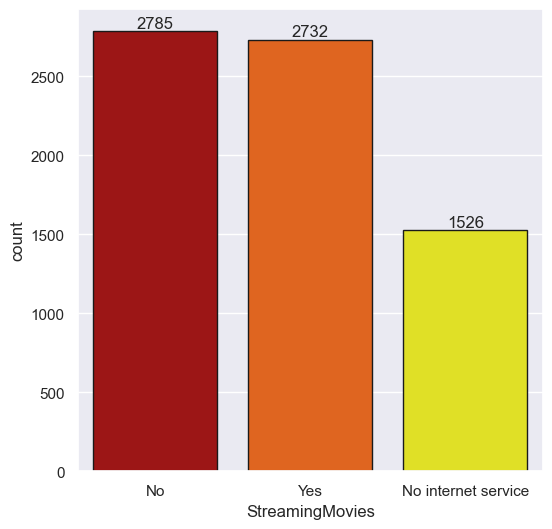

In [150]:
sns.set(rc={'figure.figsize':(6,6)})
a = sns.countplot(x = 'StreamingMovies', data = df, palette = 'hot', edgecolor = 'k')
for i in a.containers:
    a.bar_label(i)

# Observations:

- The Customers who have no Streaming Movies are more in number as compared to other.
- The Customers who have no Internet Service are less in number as compared to other.

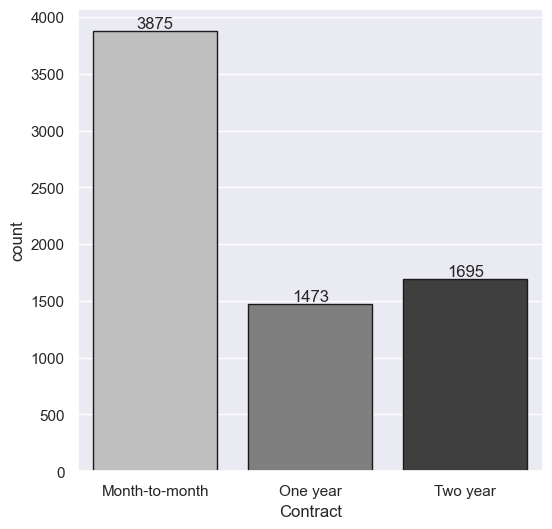

In [151]:
sns.set(rc={'figure.figsize':(6,6)})
a = sns.countplot(x = 'Contract', data = df, palette = 'binary', edgecolor = 'k')
for i in a.containers:
    a.bar_label(i)

# Observations:

- More Customers opted for Month-to-month Contract.
- Secondly, more Customers opted for Two year Contract.

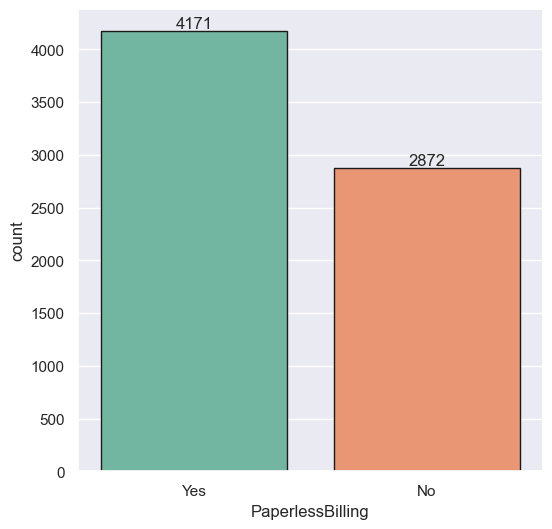

In [152]:
sns.set(rc={'figure.figsize':(6,6)})
a = sns.countplot(x = 'PaperlessBilling', data = df, palette = 'Set2', edgecolor = 'k')
for i in a.containers:
    a.bar_label(i)

# Observations:

- The Customers who vave Paperless Billing are more in number.

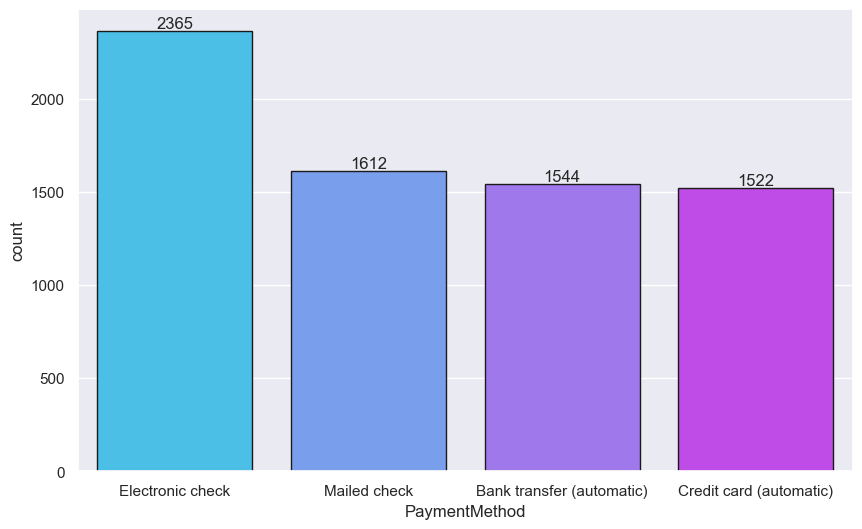

In [153]:
sns.set(rc={'figure.figsize':(10,6)})
a = sns.countplot(x = 'PaymentMethod', data = df, palette = 'cool', edgecolor = 'k')
for i in a.containers:
    a.bar_label(i)

# Observations:

- More number of Customers have done Electronic check payments.
- Less number of Customers have done Payment from Credit Cards.

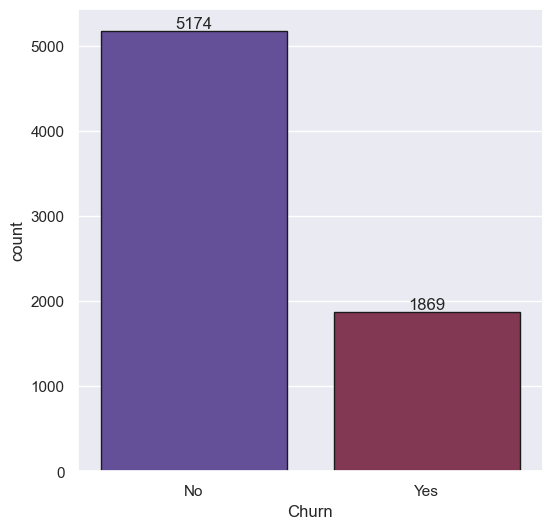

In [154]:
sns.set(rc={'figure.figsize':(6,6)})
a = sns.countplot(x = 'Churn', data = df, palette = 'twilight', edgecolor = 'k')
for i in a.containers:
    a.bar_label(i)

# Observation:

- The Customers who have churned is less in number.

<AxesSubplot:xlabel='tenure', ylabel='Count'>

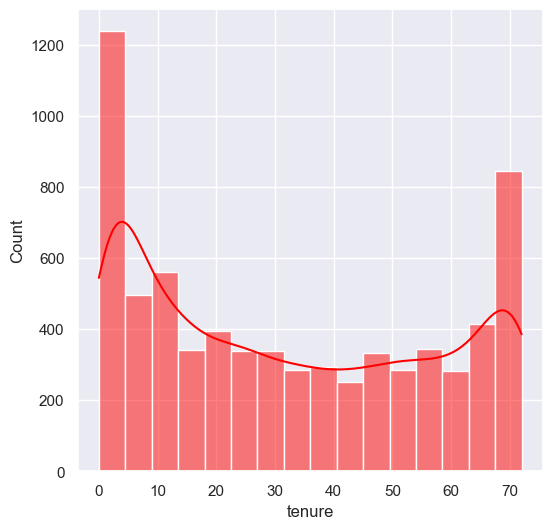

In [155]:
sns.set(rc={'figure.figsize':(6,6)})
sns.histplot(x = 'tenure', data = df, kde = True, color = 'red')


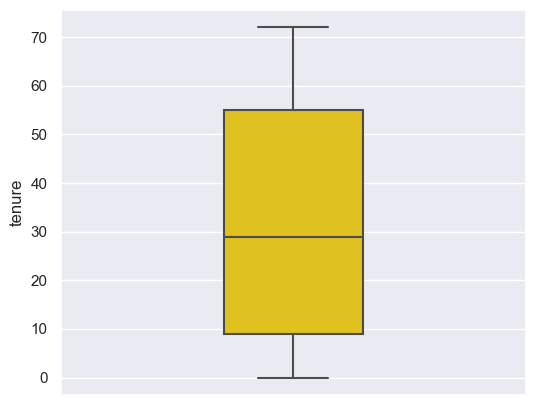

In [156]:
plt.figure(figsize = (6,5))
sns.boxplot(y = 'tenure', data = df, width = 0.3, color = 'gold' )
plt.show();

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

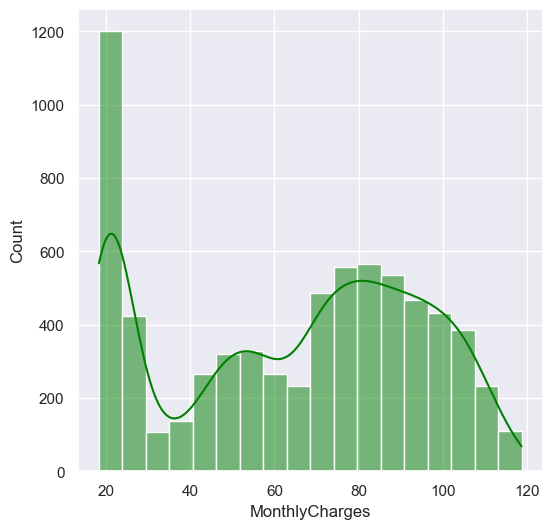

In [157]:
sns.set(rc={'figure.figsize':(6,6)})
sns.histplot(x = 'MonthlyCharges', data = df, kde = True, color = 'green')


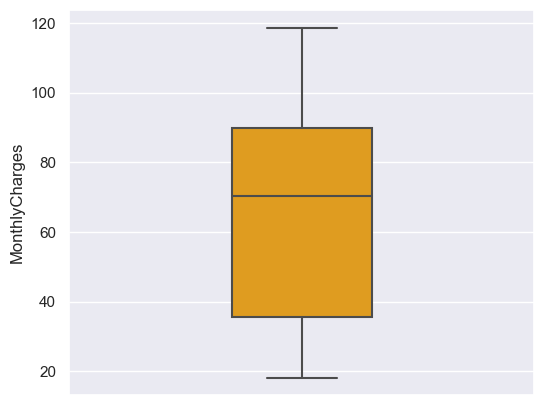

In [158]:
plt.figure(figsize = (6,5))
sns.boxplot(y = 'MonthlyCharges', data = df, width = 0.3, color = 'orange' )
plt.show();

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Count'>

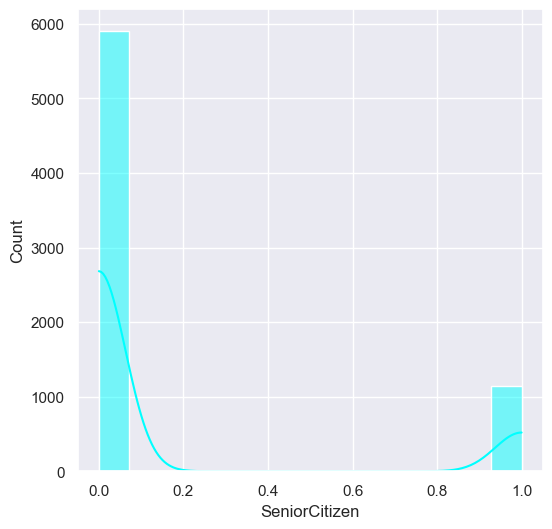

In [159]:
sns.set(rc={'figure.figsize':(6,6)})
sns.histplot(x = 'SeniorCitizen', data = df, kde = True, color = 'cyan')

In [161]:
import scipy.stats as stats

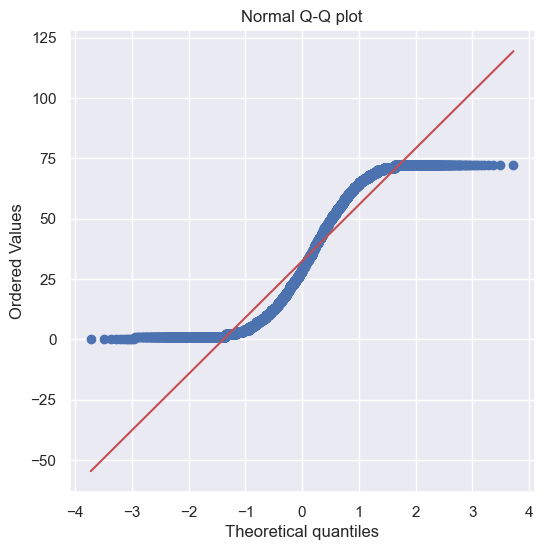

In [162]:
stats.probplot(df['tenure'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

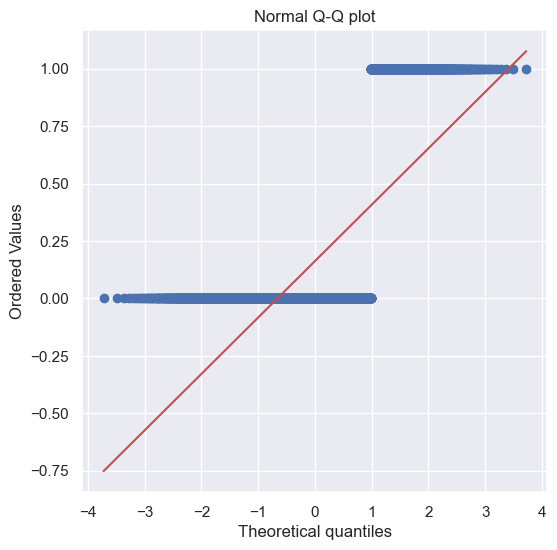

In [163]:
stats.probplot(df['SeniorCitizen'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

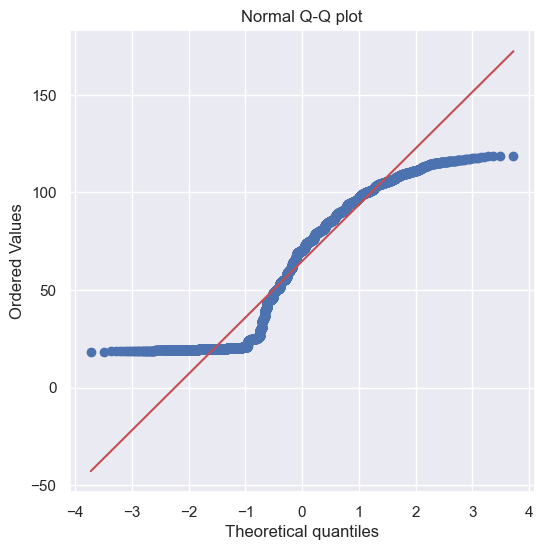

In [164]:
stats.probplot(df['MonthlyCharges'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

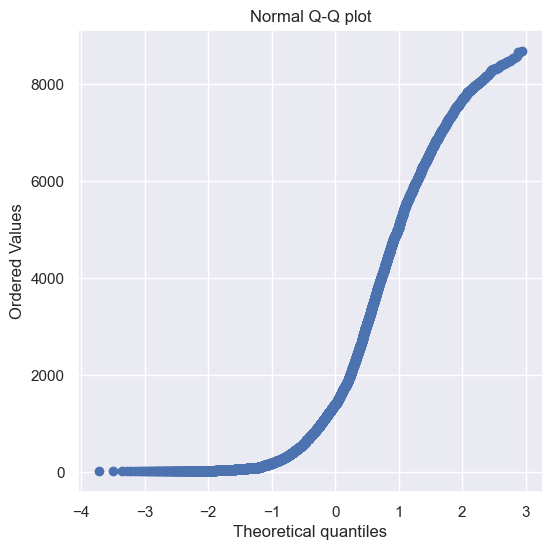

In [165]:
stats.probplot(df['TotalCharges'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

# Bi-variate Analysis:

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

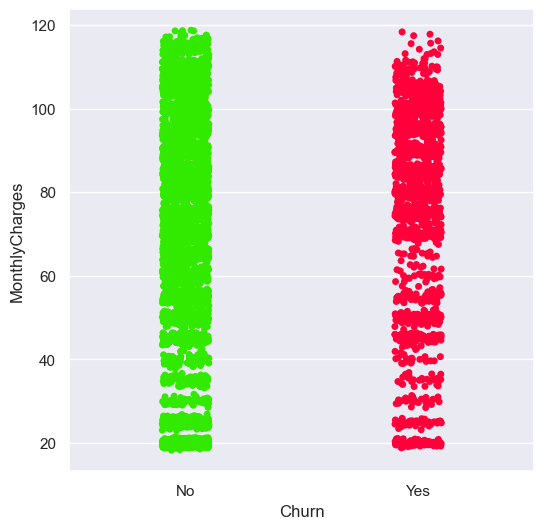

In [166]:
sns.set(rc={'figure.figsize':(6,6)})
sns.stripplot(y = 'MonthlyCharges', x = 'Churn', data = df, palette = 'prism')

# Observation:

- The Customers having Monthly Charges in between 70 to 110 are churned more.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

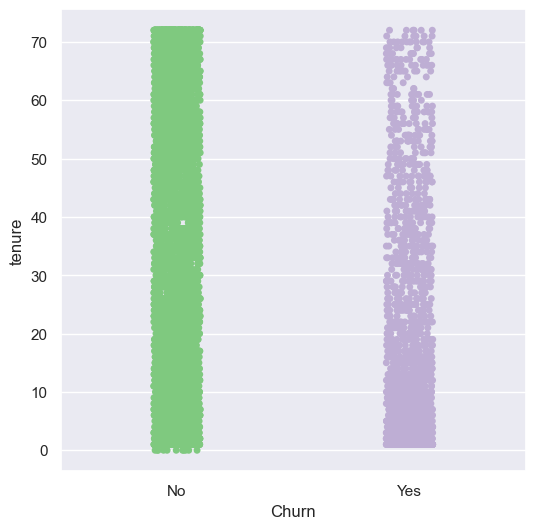

In [167]:
sns.set(rc={'figure.figsize':(6,6)})
sns.stripplot(y = 'tenure', x = 'Churn', data = df, color = 'cyan', palette = 'Accent')

# Observation:

- The Customers who have tenure from 0 to 20 years are churned more.

<AxesSubplot:xlabel='Contract', ylabel='MonthlyCharges'>

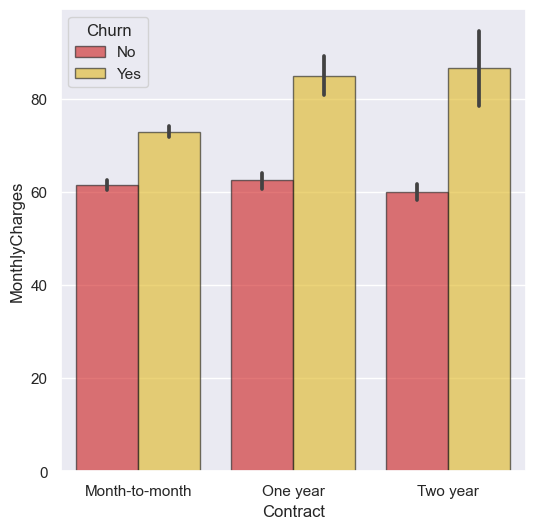

In [168]:
sns.set(rc={'figure.figsize':(6,6)})
sns.barplot(y = 'MonthlyCharges', x = 'Contract', data = df, hue = 'Churn', palette = 'hot', edgecolor = 'k', alpha = 0.6)

# Observations:

- The Customers who have Two Year Contract and who are paying high monthly charges are churned more.

<AxesSubplot:xlabel='Contract', ylabel='tenure'>

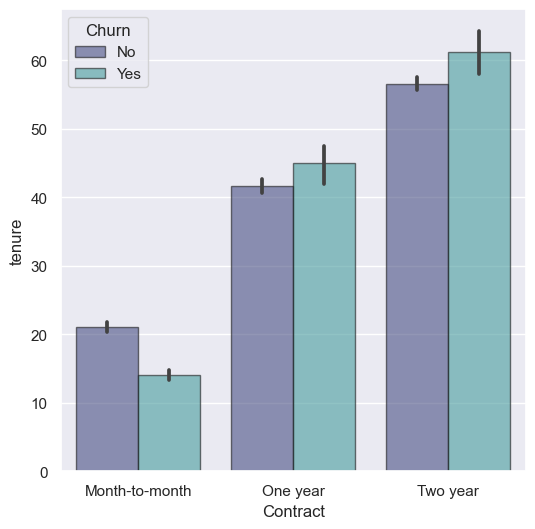

In [169]:
sns.set(rc={'figure.figsize':(6,6)})
sns.barplot(y = 'tenure', x = 'Contract', data = df, hue = 'Churn', palette = 'mako', edgecolor = 'k', alpha = 0.6)

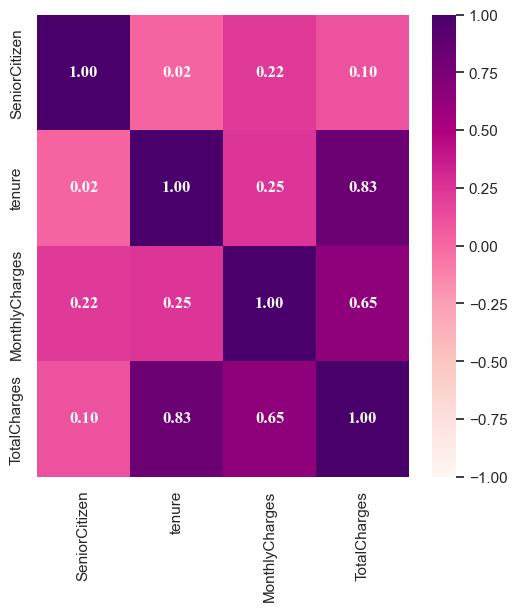

In [170]:
sns.heatmap(df.corr(), cmap = 'RdPu',center = 0, vmin = -1, vmax = 1, annot = True,
                                                                    fmt = ".2f", annot_kws = {
                                                                    'fontsize':12,
                                                                    'fontweight':'bold',
                                                                    'fontfamily':'Times new roman',
                                                                    'color':'w'
                                                                     });

C:\Users\mouni\AppData\Local\Temp\ipykernel_29328\142857273.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:


ignre plot for "customerID" column.


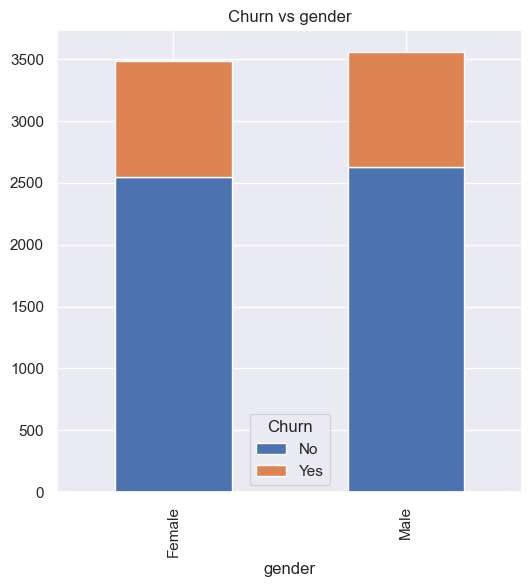

C:\Users\mouni\AppData\Local\Temp\ipykernel_29328\142857273.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:


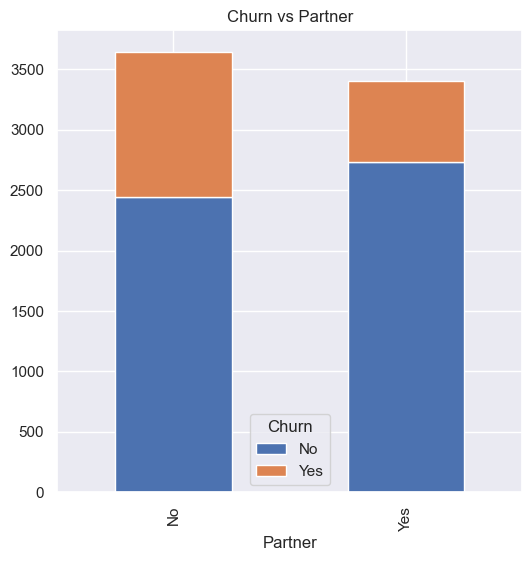

C:\Users\mouni\AppData\Local\Temp\ipykernel_29328\142857273.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:


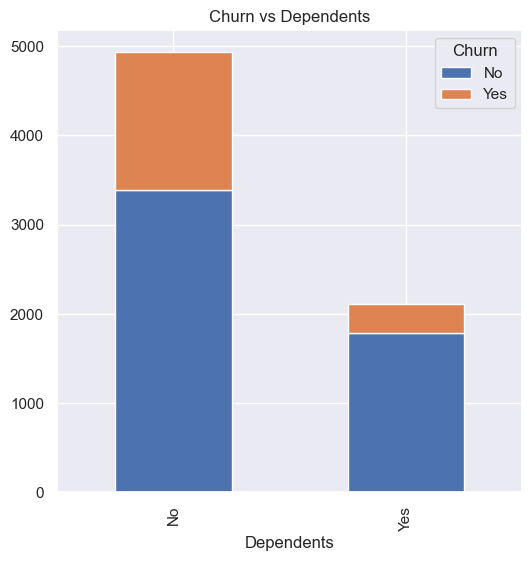

C:\Users\mouni\AppData\Local\Temp\ipykernel_29328\142857273.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:


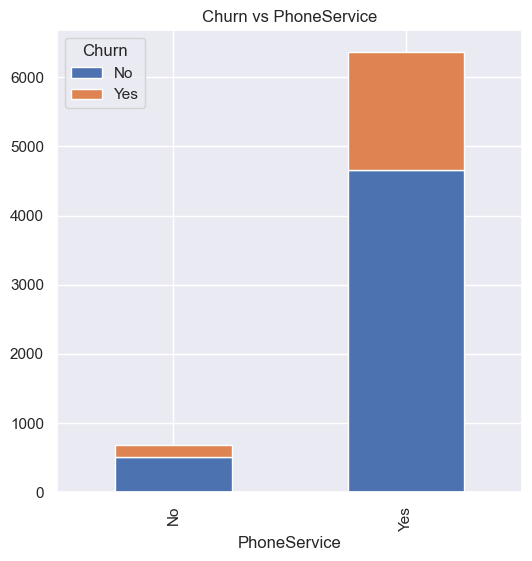

C:\Users\mouni\AppData\Local\Temp\ipykernel_29328\142857273.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:


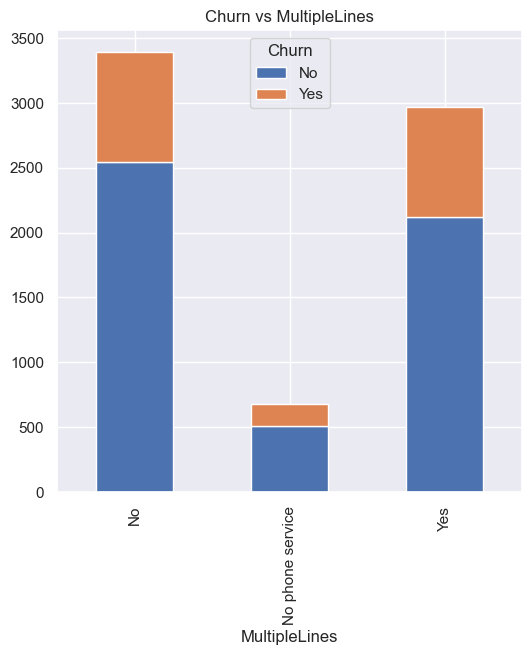

C:\Users\mouni\AppData\Local\Temp\ipykernel_29328\142857273.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:


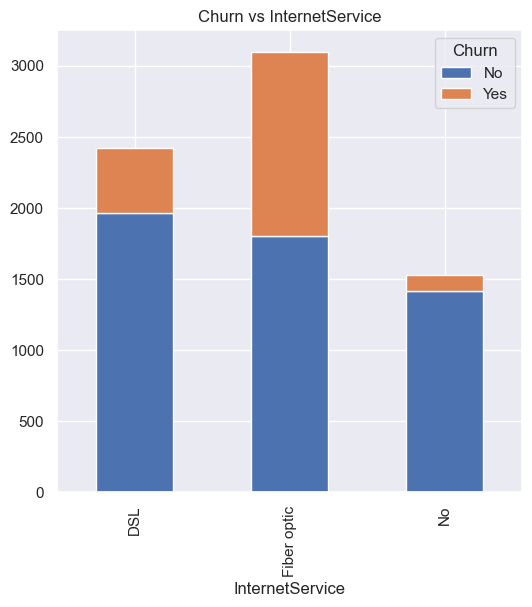

C:\Users\mouni\AppData\Local\Temp\ipykernel_29328\142857273.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:


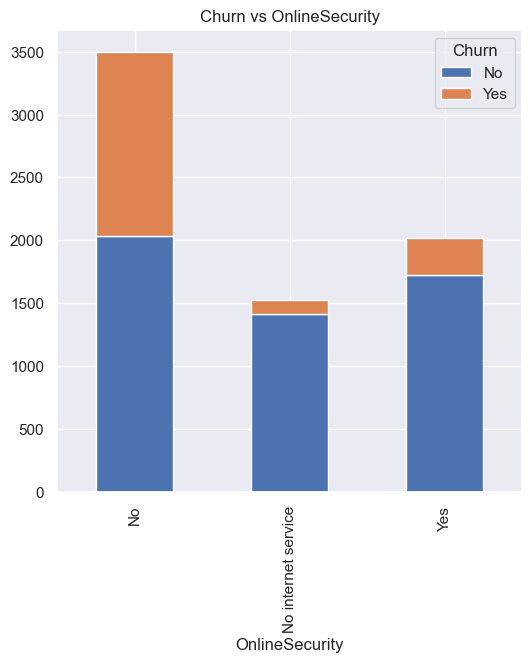

C:\Users\mouni\AppData\Local\Temp\ipykernel_29328\142857273.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:


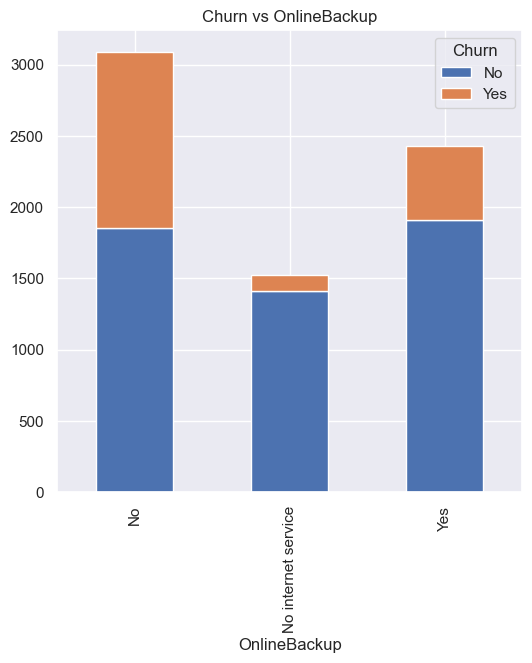

C:\Users\mouni\AppData\Local\Temp\ipykernel_29328\142857273.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:


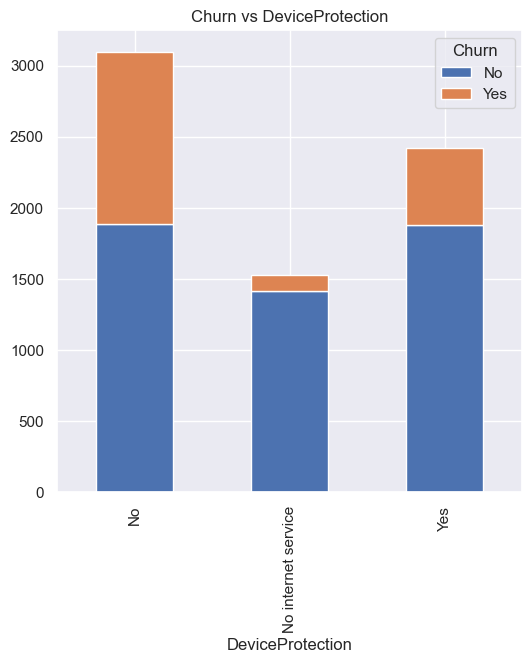

C:\Users\mouni\AppData\Local\Temp\ipykernel_29328\142857273.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:


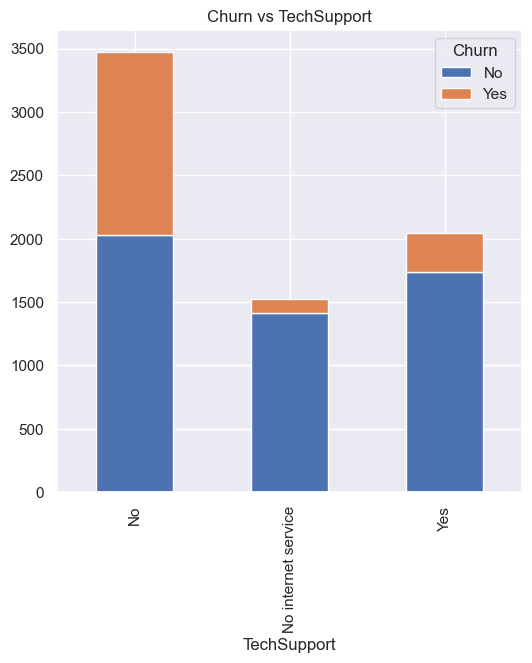

C:\Users\mouni\AppData\Local\Temp\ipykernel_29328\142857273.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:


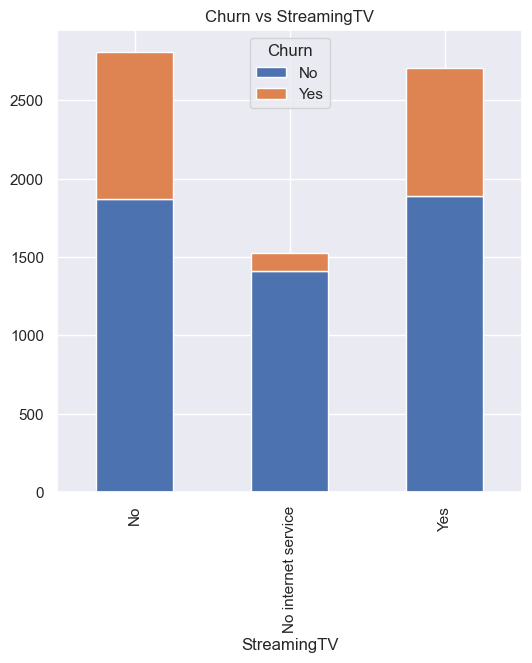

C:\Users\mouni\AppData\Local\Temp\ipykernel_29328\142857273.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:


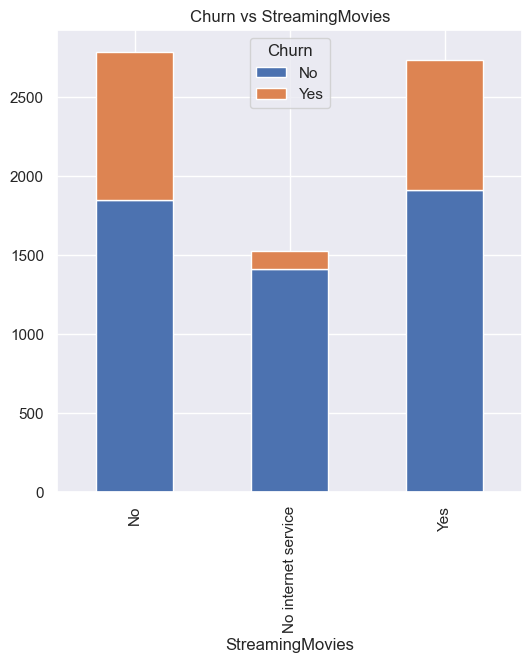

C:\Users\mouni\AppData\Local\Temp\ipykernel_29328\142857273.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:


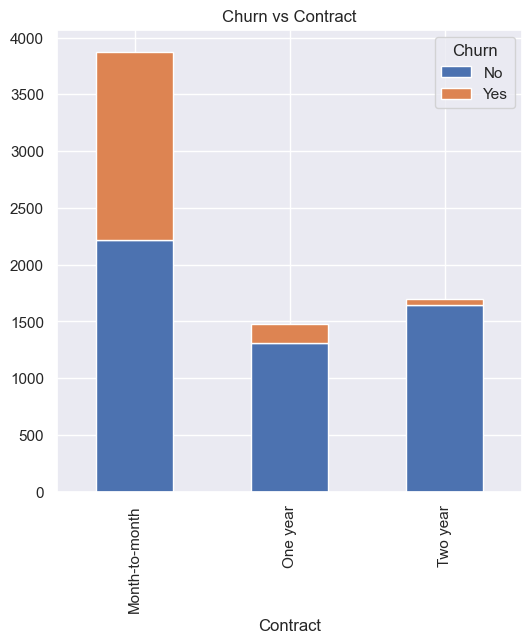

C:\Users\mouni\AppData\Local\Temp\ipykernel_29328\142857273.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:


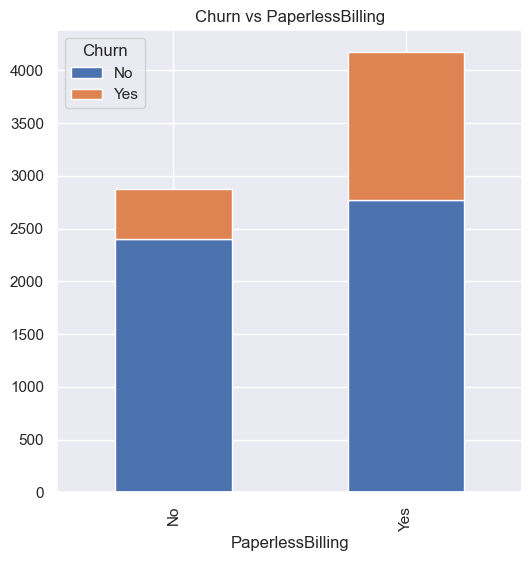

C:\Users\mouni\AppData\Local\Temp\ipykernel_29328\142857273.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:


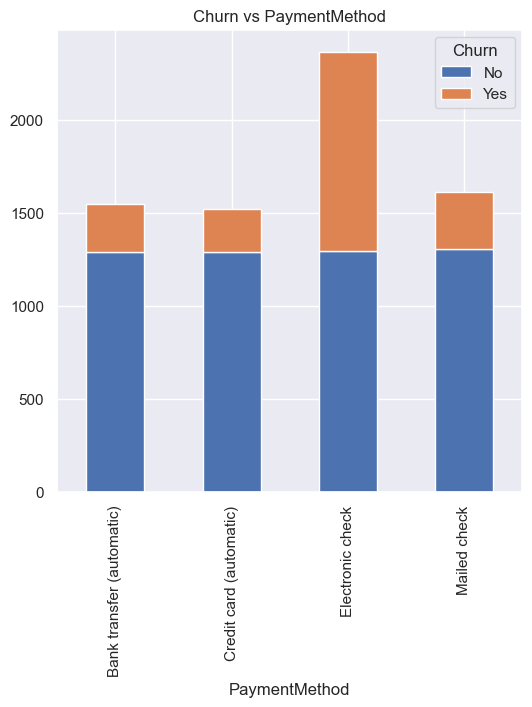

C:\Users\mouni\AppData\Local\Temp\ipykernel_29328\142857273.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:


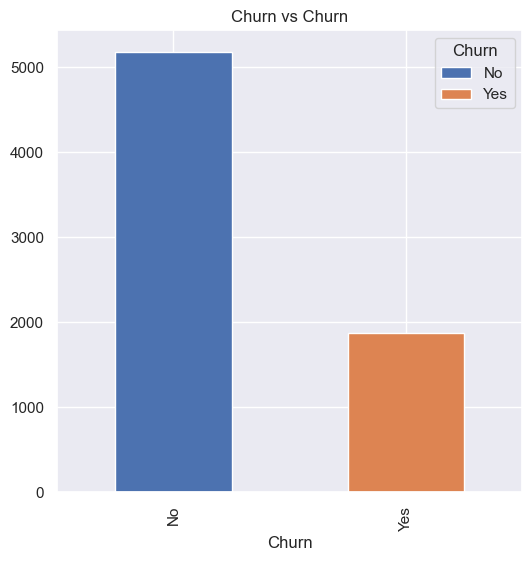

In [171]:
def plot_stack(df):
    Churn_column = df['Churn']
    for column in df.columns:
        if df[column].dtype == np.object:
            if column == 'customerID':
                print('ignre plot for "customerID" column.')
            else:
                plot_stack = pd.crosstab(index = df[column], columns = Churn_column)
                plot_stack.plot(kind = 'bar', stacked = True)
                plt.title(f"Churn vs {column}")
                plt.show()
plot_stack(df)